In [1]:
10library(nnet)
library(MASS)
# Les donn\’ees
x <-sort(10*runif(50))
y <- sin(x)+0.2*rnorm(x)
data <- data.frame(x,y)
# Construction du PMC linout=TRUE pour \ˆetre entre 0 et 1
nn <- nnet(x,y,size=4,maxit=100,linout=TRUE)

# weights:  13
initial  value 31.856889 
iter  10 value 16.464271
iter  20 value 7.837169
iter  30 value 6.574732
iter  40 value 5.517599
iter  50 value 3.743565
iter  60 value 3.338737
iter  70 value 2.623770
iter  80 value 2.207291
iter  90 value 2.132081
iter 100 value 2.086981
final  value 2.086981 
stopped after 100 iterations


In [2]:
head(data)

x,y
0.02219009,0.134121827
0.06739468,0.007557147
0.53061130,0.403947342
0.57086937,0.826243888
0.86433754,0.671456878
0.98710382,0.951845095


In [3]:
5+6

[1] 11

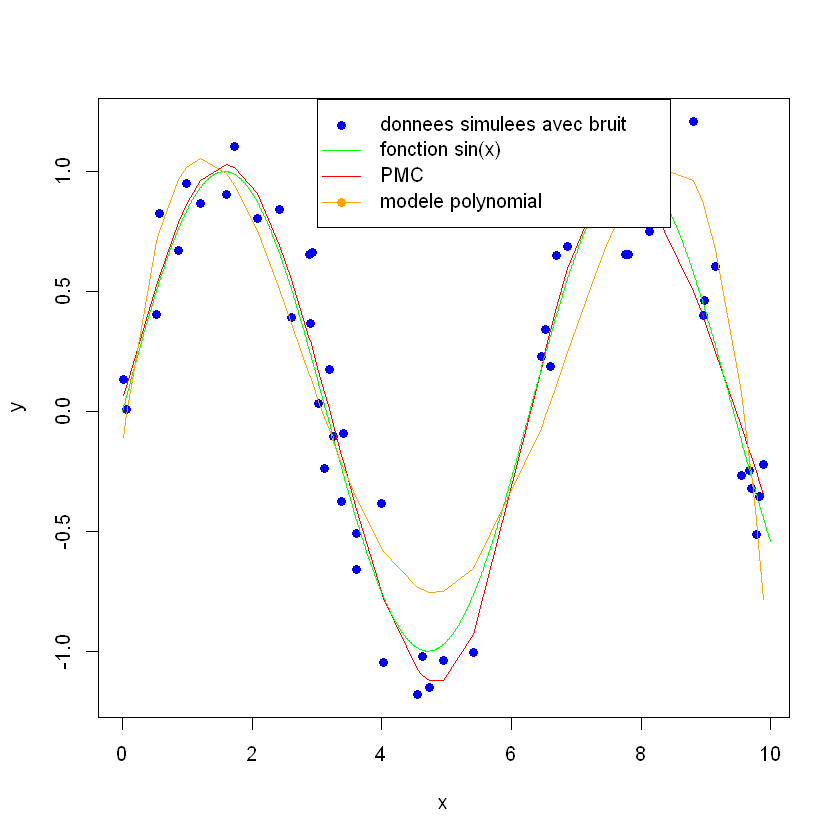

In [4]:
plot(x,y,col="blue",pch=16)
#PMC
lines(x,predict(nn,data.frame(x=x)),col="red")
x1<-seq(0,10,by=0.01)
 lines(x1,sin(x1),col="green")
 # Comparaison avec le mod\‘ele polynomial
modelPoly <- lm(y~x + I(x^2) + I(x^3) + I(x^4))
lines(x,predict(modelPoly), col="orange")
# L\’egende
legend(3,1.3,c("donnees simulees avec bruit","fonction sin(x)","PMC",
"modele polynomial"),lty=c(0,1,1,1),pch=c(16,-1,-1-1),
col=c("blue","green","red","orange"))

In [5]:
appindex = sample(1 :nrow(iris), round(2*nrow(iris)/3), replace = FALSE)

In [6]:
app = iris[appindex, ]
val = iris[-appindex, ]
val

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
16,5.7,4.4,1.5,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
22,5.1,3.7,1.5,0.4,setosa


In [7]:
model.dis = nnet(Species~., data = app, size = 2, decay = 0.001)

# weights:  19
initial  value 115.682573 
iter  10 value 109.097462
iter  20 value 109.082612
iter  30 value 43.041580
iter  40 value 11.598489
iter  50 value 5.551971
iter  60 value 5.371708
iter  70 value 5.370247
iter  80 value 5.366525
iter  90 value 5.002535
iter 100 value 3.980430
final  value 3.980430 
stopped after 100 iterations


In [8]:
summary(model.dis)

a 4-2-3 network with 19 weights
options were - softmax modelling  decay=0.001
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
 -0.25  -0.06  -2.25   3.01  -3.18 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
  4.35   0.39   0.54  -0.66  -3.28 
 b->o1 h1->o1 h2->o1 
-18.37 -12.39  25.94 
 b->o2 h1->o2 h2->o2 
 -5.83  14.54   7.52 
 b->o3 h1->o3 h2->o3 
 24.11  -2.15 -33.51 

In [9]:
val[, -5]
val[, 5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
12,4.8,3.4,1.6,0.2
14,4.3,3.0,1.1,0.1
16,5.7,4.4,1.5,0.4
18,5.1,3.5,1.4,0.3
19,5.7,3.8,1.7,0.3
22,5.1,3.7,1.5,0.4


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] setosa     setosa     setosa     versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [10]:
pred = predict(model.dis, newdata = val[,-5], type = "class")

In [11]:
pred

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[21] "setosa"     "versicolor" "versicolor" "versicolor" "versicolor"
[26] "versicolor" "virginica"  "versicolor" "versicolor" "versicolor"
[31] "versicolor" "versicolor" "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "versicolor" "virginica"  "versicolor"
[41] "virginica"  "virginica"  "versicolor" "versicolor" "virginica" 
[46] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [12]:
mat = table(pred, val[, 5])
taux = sum(diag(mat))/ sum(mat)
mat

            
pred         setosa versicolor virginica
  setosa         21          0         0
  versicolor      0         10         4
  virginica       0          1        14

In [13]:
taux

[1] 0.9

In [14]:
library(e1071)


Warning message:
"package 'e1071' was built under R version 3.6.2"

In [15]:
tune.model = tune.nnet(Species~., data = app, size = c(1, 3, 5),
decay = c(0.1,0.001,0.000001))

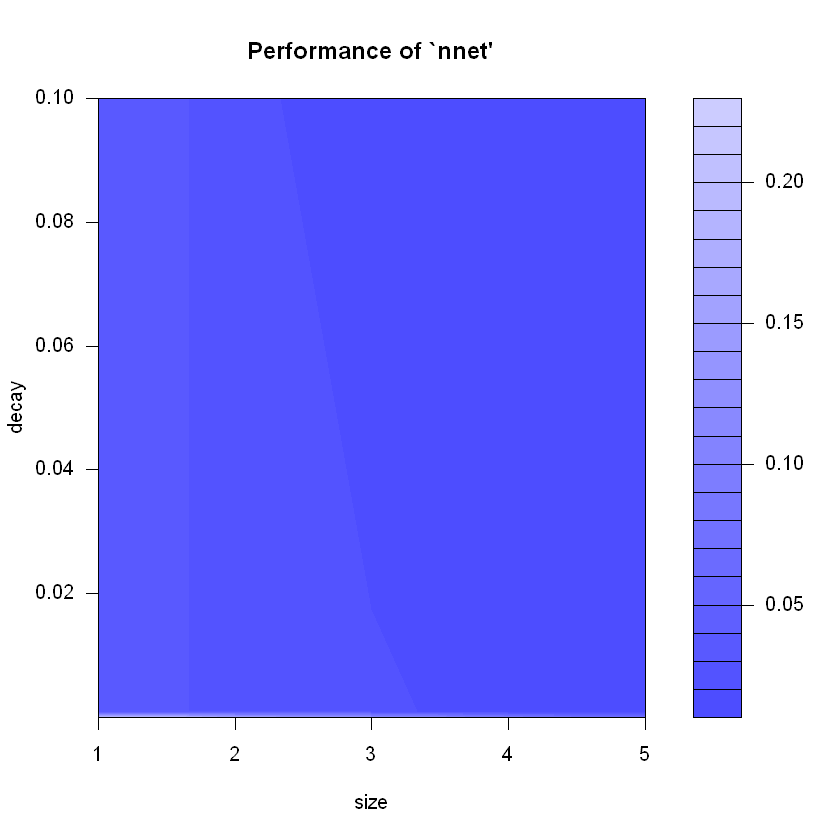

In [16]:
plot(tune.model)

In [17]:
tune.model


Parameter tuning of 'nnet':

- sampling method: 10-fold cross validation 

- best parameters:
 size decay
    3   0.1

- best performance: 0.01 


In [18]:
model = nnet(Species~., data = app, size = 3, decay = 0.1, maxit = 100)

# weights:  27
initial  value 122.323051 
iter  10 value 28.769850
iter  20 value 20.598844
iter  30 value 19.563461
final  value 19.563437 
converged


In [19]:
summary(model)

a 4-3-3 network with 27 weights
options were - softmax modelling  decay=0.1
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
  2.80   1.57   1.05  -1.88  -3.90 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
  0.22   0.38   1.13  -1.93  -0.78 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 
 -0.23  -0.33  -0.92   1.40   0.68 
 b->o1 h1->o1 h2->o1 h3->o1 
 -0.07   0.99   3.08  -2.87 
 b->o2 h1->o2 h2->o2 h3->o2 
 -1.32   3.79  -2.82   0.86 
 b->o3 h1->o3 h2->o3 h3->o3 
  1.39  -4.78  -0.26   2.01 

In [20]:
pred = predict(model, newdata = val[,-5], type = "class")
mat = table(pred, val[, 5])
taux = sum(diag(mat))/ sum(mat)
mat
taux


            
pred         setosa versicolor virginica
  setosa         21          0         0
  versicolor      0         10         2
  virginica       0          1        16

[1] 0.94

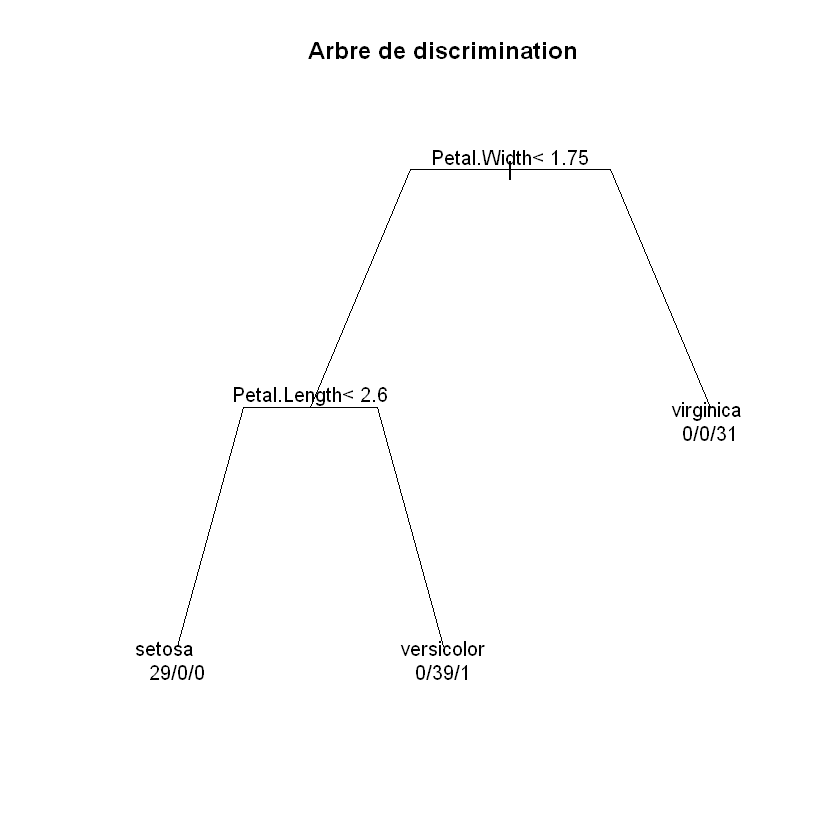

In [21]:
library(rpart)
model = rpart(Species~., data = app, method = "class")
plot(model, uniform = TRUE, branch = 0.5, margin = 0.1, main = "Arbre de discrimination")
text(model, all = FALSE, use.n = TRUE)

In [22]:
tune.model = tune.rpart (Species~., data = app, minsplit = c (15, 20, 25), cp = c (0.00001,
0.000001), maxcompete = 4, maxsurrogate = 5,
usesurrogate = 2, xval = c (10, 15), surrogatestyle = 0, maxdepth = c (25, 30))

In [23]:
tune.model


Parameter tuning of 'rpart.wrapper':

- sampling method: 10-fold cross validation 

- best parameters:
 minsplit    cp maxcompete maxsurrogate usesurrogate xval surrogatestyle
       15 1e-05          4            5            2   10              0
 maxdepth
       25

- best performance: 0.02 


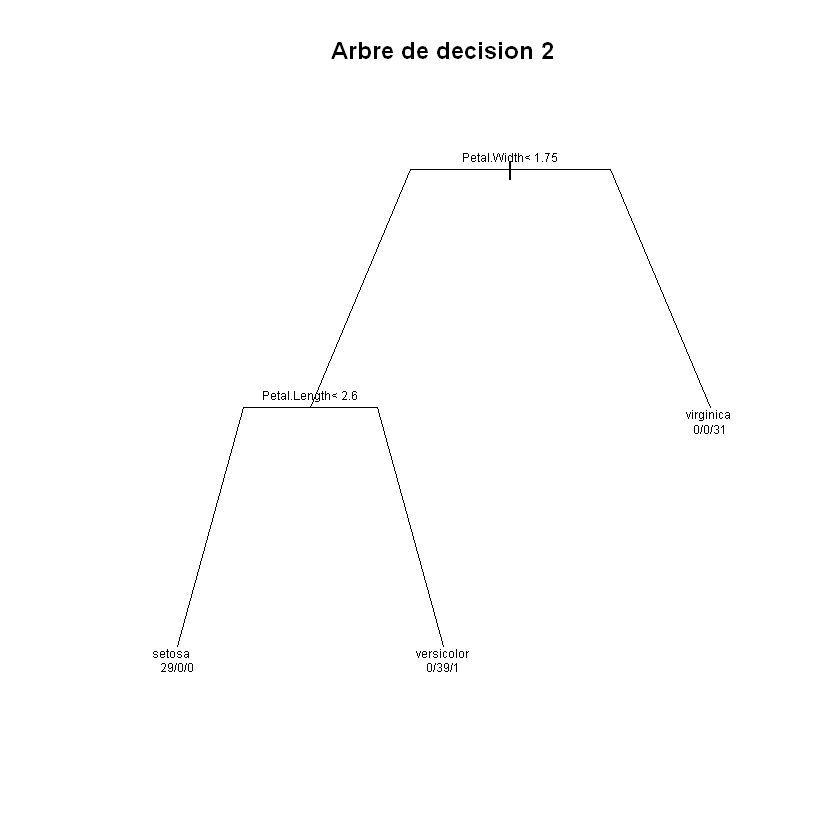

In [24]:
model = rpart(Species~., data = app, method = "class",
control = rpart.control (cp = 0.00001, minsplit = 15, maxcompete = 4, maxsurrogate = 5,
usesurrogate = 2, xval = 10, surrogatestyle = 0, maxdepth = 25))
cpTab = as.data.frame(model $ cptable)
ind = cpTab $ xerror + cpTab $ xstd
cpTab = cbind.data.frame(cpTab, ind)
monCp = cpTab[which.min(cpTab $ ind), "CP"]
elag = prune(model, cp = monCp)
plot(elag, uniform = TRUE, branch = 0.5, margin = 0.1, main = "Arbre de decision 2")
text(elag, all = FALSE, use.n = TRUE, cex = 0.6)

In [25]:
prev = predict(elag, newdata = val[,-5], type = "class")

In [26]:
mat = table(prev, val[, 5])
taux = sum(diag(mat))/ sum(mat)
mat
taux

            
prev         setosa versicolor virginica
  setosa         21          0         0
  versicolor      0         10         4
  virginica       0          1        14

[1] 0.9